<a href="https://colab.research.google.com/github/JyotiLucky/Heart-Disease-Prediction/blob/main/Predictive_model_for_Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HEART DISEASE PREDICTION**


The dataset consists of 303 entries with 14 columns. The columns represent different features related to heart health, including:


age: Age of the patient

sex: Gender (1 = male, 0 = female)

cp: Chest pain type (0-3)

trtbps: Resting blood pressure

chol: Serum cholesterol in mg/dl

fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)

restecg: Resting electrocardiographic results (0-2)

thalachh: Maximum heart rate achieved

exng: Exercise-induced angina (1 = yes, 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slp: Slope of the peak exercise ST segment (0-2)

caa: Number of major vessels (0-4) colored by fluoroscopy

thall: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)

output: Target variable (1 = presence of heart disease, 0 = absence of heart disease)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
# Load the dataset
file_path = "/heart.csv"
heart_data = pd.read_csv(file_path)

# Display the first few rows and summary information
heart_data.head(10), heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0   63    1   3     145   233    1        0       150     0      2.3    0   
 1   37    1   2     130   250    0        1       187     0      3.5    0   
 2   41    0   1     130   204    0        0       172     0      1.4    2   
 3   56    1   1     120   236    0        1       178     0      0.8    2   
 4   57    0   0     120   354    0        1       163     1      0.6    2   
 5   57    1   0     140   192    0        1       148     0      0.4    1   
 6   56    0   1     140   294    0        0       153     0      1.3    1   
 7   44    1   1     120   263    0        1       173     0      0.0    2   
 8   52    1   2     172   199    1        1       162     0      0.5    2   
 9   57    1   2     150   168    0        1       174     0      1.6    2   
 
    caa  thall  output  
 0    0      1       1  
 1    0      2       1  
 2    0      2       1  
 3    0      2       1  
 4    0      2 

**Split the data into features and target**

In [7]:
X = heart_data.drop(columns=['output'])
y = heart_data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardize the features**

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**ACCURACY THROUGH LOGISTIC REGRESSION**

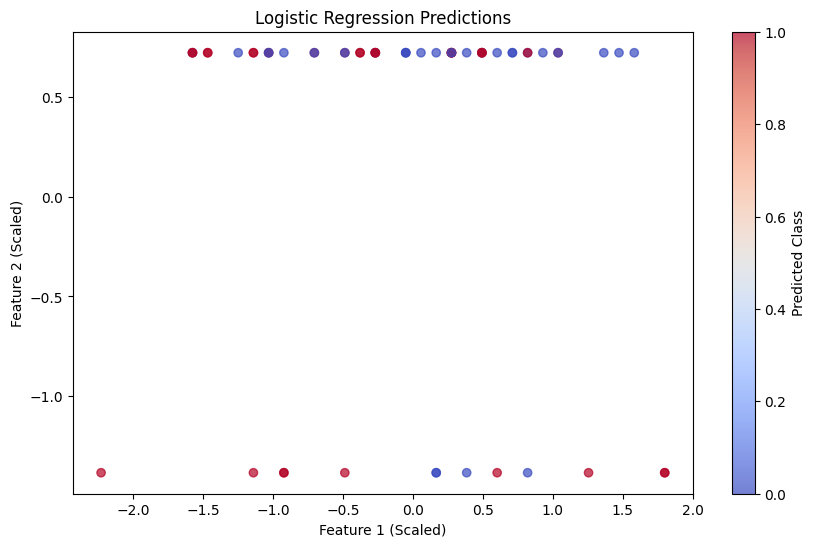

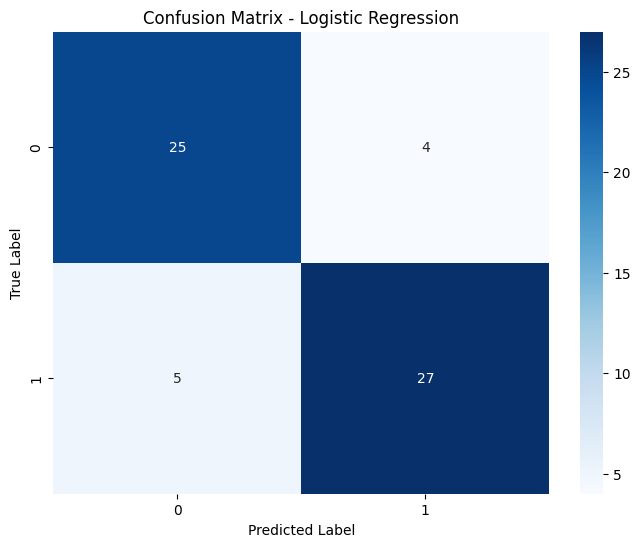

acccuracy score of heart dataset through logistic regression is  0.8524590163934426


In [13]:
# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Visualize the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred_logreg, cmap='coolwarm', alpha=0.7)

plt.title('Logistic Regression Predictions')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.colorbar(label='Predicted Class')
plt.show()

# Confusion Matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print('acccuracy score of heart dataset through logistic regression is ',accuracy_logreg)

**k neighbors classifiers**

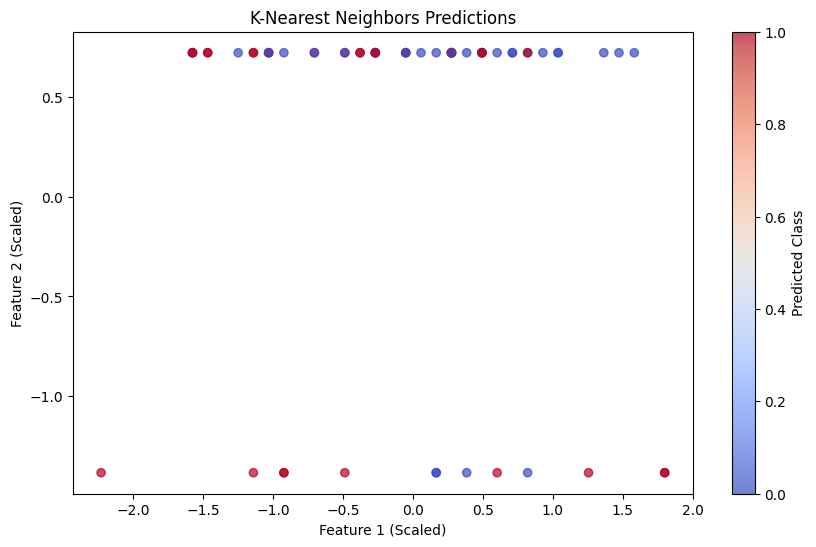

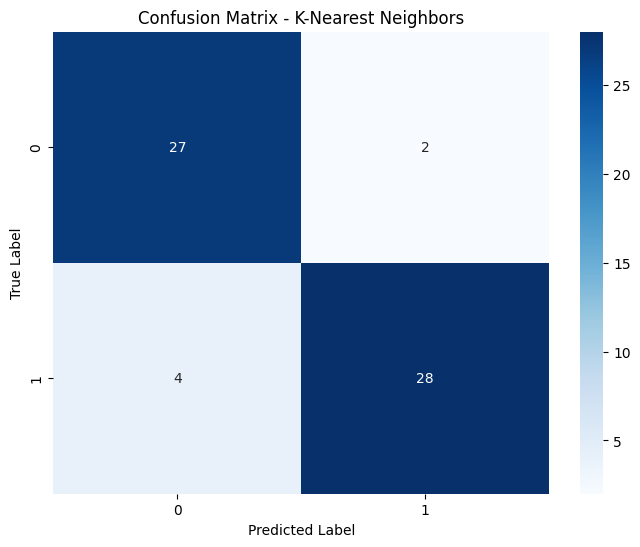

accuracy through knn is : 0.9016393442622951


In [14]:
# Train K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Visualize the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred_knn, cmap='coolwarm', alpha=0.7)
plt.title('K-Nearest Neighbors Predictions')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.colorbar(label='Predicted Class')
plt.show()

# Confusion Matrix for K-Nearest Neighbors
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('accuracy through knn is :',accuracy_knn)

**Support Vector Machine**

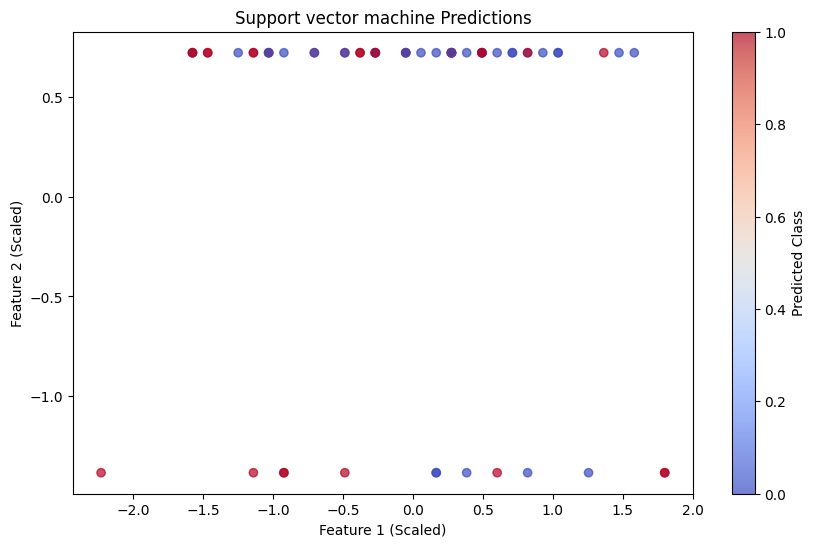

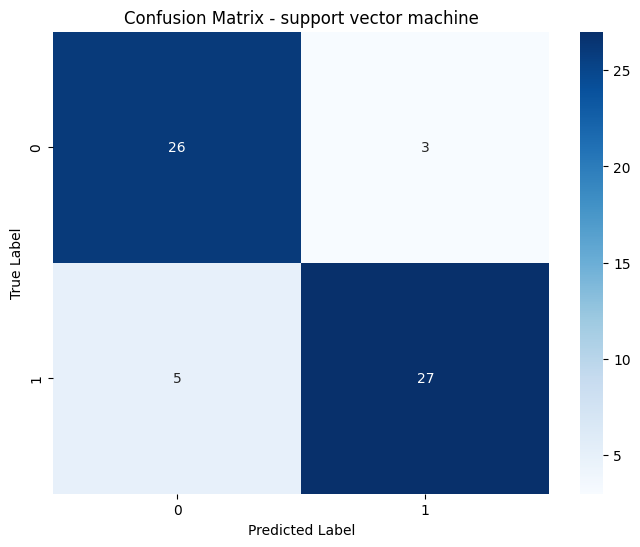

accuracy through SVM is : 0.8688524590163934


In [21]:
# Train SVM model
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred= svm.predict(X_test_scaled)

# Visualize the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.title('Support vector machine Predictions')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.colorbar(label='Predicted Class')
plt.show()

# Confusion Matrix for support vector machine
conf_matrix_svm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - support vector machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy_svm = accuracy_score(y_test, y_pred)
print('accuracy through SVM is :',accuracy_svm)

**Naive Bayes**

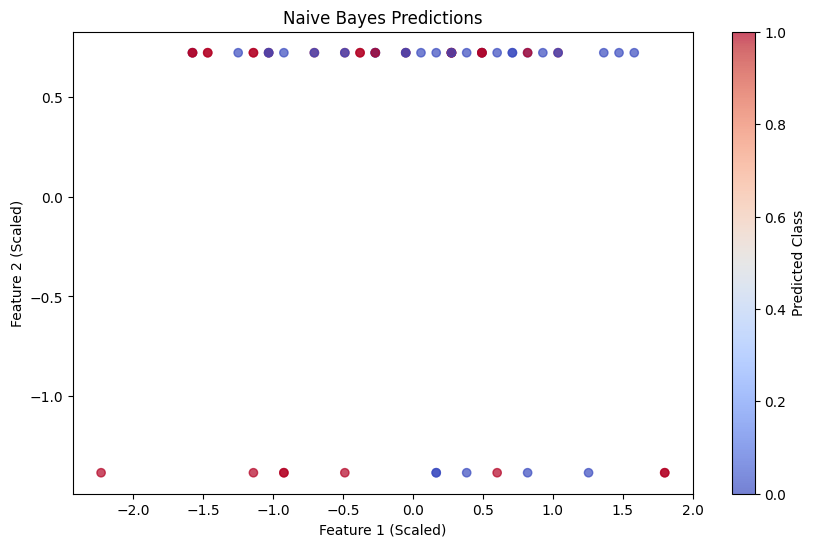

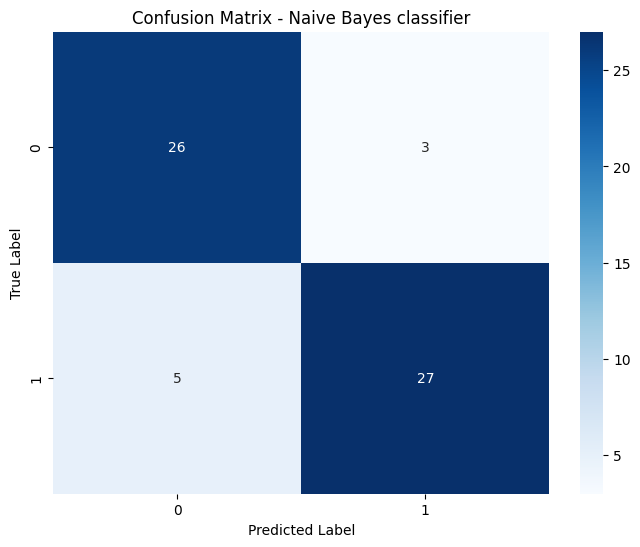

accuracy through Naive bayes is : 0.8688524590163934


In [23]:
# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

# Visualize the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred_nb, cmap='coolwarm', alpha=0.7)
plt.title('Naive Bayes Predictions')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.colorbar(label='Predicted Class')
plt.show()

# Confusion Matrix for naive bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy_nb= accuracy_score(y_test, y_pred_nb)
print('accuracy through Naive bayes is :',accuracy_nb)

**Random Forest**

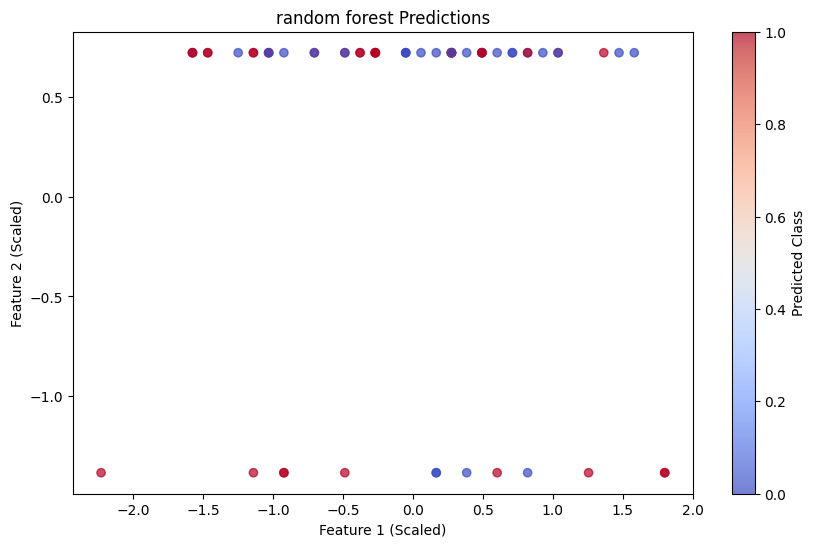

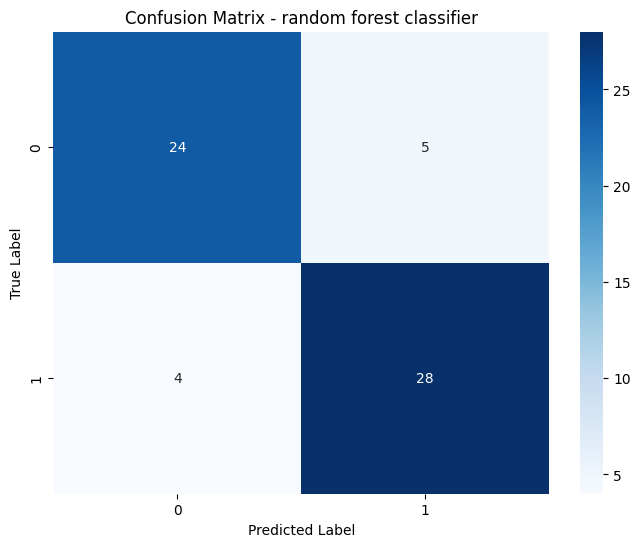

accuracy through random forest classifier is : 0.8524590163934426


In [24]:
# Train random forest model
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Visualize the actual vs predicted results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred_rf, cmap='coolwarm', alpha=0.7)
plt.title('random forest Predictions')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.colorbar(label='Predicted Class')
plt.show()

# Confusion Matrix for random forest classifier
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - random forest classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy_rf= accuracy_score(y_test, y_pred_rf)
print('accuracy through random forest classifier is :',accuracy_rf)

In [25]:
import numpy as np

# Function to take user input and predict output
def user_input_prediction(model, scaler):
    print("Please enter the following values to check the output:")

    # Prompt user for input for each feature
    user_input = []
    for i in range(X.shape[1]):
        value = float(input(f"Enter value for Feature {i+1}: "))
        user_input.append(value)

    # Convert input to a numpy array and scale it
    user_input = np.array(user_input).reshape(1, -1)
    user_input_scaled = scaler.transform(user_input)

    # Predict using the model
    prediction = model.predict(user_input_scaled)

    # Output the prediction
    if prediction[0] == 1:
        print("The model predicts: Positive Outcome (Class 1)")
    else:
        print("The model predicts: Negative Outcome (Class 0)")

In [26]:
user_input_prediction(logreg, scaler)
21

Please enter the following values to check the output:
Enter value for Feature 1: 63
Enter value for Feature 2: 1
Enter value for Feature 3: 3
Enter value for Feature 4: 145
Enter value for Feature 5: 233
Enter value for Feature 6: 1
Enter value for Feature 7: 0
Enter value for Feature 8: 150
Enter value for Feature 9: 0
Enter value for Feature 10: 2.3
Enter value for Feature 11: 0
Enter value for Feature 12: 0
Enter value for Feature 13: 1
The model predicts: Positive Outcome (Class 1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
user_input_prediction(knn, scaler)


In [ ]:
user_input_prediction(svm, scaler)


In [ ]:
user_input_prediction(nb, scaler)


In [ ]:
user_input_prediction(rf, scaler)